## 导入必要的包

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import scale
from torchsummary import summary
from matplotlib.font_manager import FontProperties

torch.__version__

'1.6.0'

## 数据读取  
本次数据读取将采用两种方式进行，一种是从原始的`housing.csv`文件进行读取，一种是利用`sklearn`集成的数据读取方式进行读取

### 从原始数据读取房价信息

In [2]:
data_frame = pd.read_csv('./boston/housing.csv', header=None)

原始的`housing.csv`将一行数据存储在一个单元格中，因此需要读取此单元格并将里面的内容从字符串转变为`float`类型

In [3]:
all_data = []

for column in range(len(data_frame)):
    column_data = []
    for data in list(data_frame.iloc[column])[0].split(' '):
        if data != '':
            column_data.append(float(data))
    all_data.append(column_data)

all_data = np.array(all_data)

划分训练数据与标签数据`(GroundTruth)`

In [4]:
x_data = all_data[:, :13]
y_data = all_data[:, 13]

查看部分数据

In [5]:
print('x_data:\n', x_data, '\n x_data shape:', x_data.shape,
      '\ny_data:\n', y_data, '\n y_data shape:', y_data.shape)

x_data:
 [[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]] 
 x_data shape: (506, 13) 
y_data:
 [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.

### sklearn自动读取

利用`sklearn`中的`load_boston`直接获取

In [6]:
from sklearn.datasets import load_boston

boston = load_boston()

获取数据键

In [7]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

获取训练数据

In [8]:
boston['data'].shape

(506, 13)

获取特征名

In [9]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

获取一则训练数据

In [10]:
boston['data'][0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

获取标签数据`(GroundTruth)`

In [11]:
boston['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

### 对比两种方式所获取数据

对比训练数据是否相同

In [12]:
(x_data == boston['data']).all()

True

对比标签数据`(GroundTruth)`是否相同

In [13]:
(y_data == boston['target']).all()

True

## 训练阶段

获取设备信息

In [14]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

device

device(type='cuda', index=0)

构建模型

In [15]:
class Net(nn.Module):
    def __init__(self, input_num, hidden_num, output_num):
        super(Net, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_num, hidden_num),
            nn.ReLU(),
            nn.Linear(hidden_num, output_num),
            nn.ReLU()
        )

    def forward(self, input):
        return self.net(input)

In [16]:
net = Net(input_num=13, hidden_num=14, output_num=1).to(device)

summary(net, input_size=(13,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 14]             196
              ReLU-2                   [-1, 14]               0
            Linear-3                    [-1, 1]              15
              ReLU-4                    [-1, 1]               0
Total params: 211
Trainable params: 211
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


使用`scale`进行归一化，使用`unsqueeze`整理维度

In [17]:
x_data, y_data = torch.FloatTensor(scale(x_data)).to(device), torch.unsqueeze(torch.FloatTensor(y_data), dim=1).to(device)

划分训练集及验证集

In [18]:
train_x, train_y = x_data[0:400, :], y_data[0:400]
valid_x, valid_y = x_data[400:, :], y_data[400:]

设置超参数

In [19]:
epochs = 200
learning_rate = 0.001
batch_size = 10
total_step = int(train_x.shape[0] / batch_size)

定义优化器以及损失函数

In [20]:
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

loss_func = torch.nn.MSELoss()

定义参数重置函数，保证每次重新执行`for循环`时从`零`开始训练

In [21]:
def weight_reset(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        m.reset_parameters()

In [22]:
%%time

net.apply(weight_reset)

epoch_train_loss_value = []
step_train_loss_value = []
epoch_valid_loss_value = []

for i in range(epochs):
    for step in range(total_step):
        xs = train_x[step * batch_size:(step + 1) * batch_size, :]
        ys = train_y[step * batch_size:(step + 1) * batch_size]
        prediction = net(xs)
        loss = loss_func(prediction, ys)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        step_train_loss_value.append(loss.cpu().detach().numpy())
    valid_loss = loss_func(net(valid_x), valid_y)
    epoch_valid_loss_value.append(valid_loss)
    epoch_train_loss_value.append(np.mean(step_train_loss_value))
    print('epoch={:3d}/{:3d}, train_loss={:.4f}, valid_loss={:.4f}'.format(i + 1,
                                                                    epochs,
                                                                    np.mean(step_train_loss_value),
                                                                    valid_loss))

epoch=  1/200, train_loss=653.8335, valid_loss=264.7458
epoch=  2/200, train_loss=646.1258, valid_loss=261.1905
epoch=  3/200, train_loss=637.3733, valid_loss=257.5962
epoch=  4/200, train_loss=627.2027, valid_loss=254.1343
epoch=  5/200, train_loss=615.4006, valid_loss=250.7759
epoch=  6/200, train_loss=601.7940, valid_loss=247.1643
epoch=  7/200, train_loss=586.2170, valid_loss=243.3159
epoch=  8/200, train_loss=568.6688, valid_loss=239.3569
epoch=  9/200, train_loss=549.4550, valid_loss=235.2637
epoch= 10/200, train_loss=529.1013, valid_loss=231.0793
epoch= 11/200, train_loss=508.2026, valid_loss=226.8463
epoch= 12/200, train_loss=487.3250, valid_loss=222.6290
epoch= 13/200, train_loss=466.9410, valid_loss=218.4012
epoch= 14/200, train_loss=447.4058, valid_loss=214.2304
epoch= 15/200, train_loss=428.9496, valid_loss=210.0949
epoch= 16/200, train_loss=411.6878, valid_loss=206.0021
epoch= 17/200, train_loss=395.6431, valid_loss=201.9192
epoch= 18/200, train_loss=380.7723, valid_loss=1

epoch=152/200, train_loss=72.5505, valid_loss=20.1537
epoch=153/200, train_loss=72.1711, valid_loss=20.0341
epoch=154/200, train_loss=71.7960, valid_loss=19.9127
epoch=155/200, train_loss=71.4250, valid_loss=19.7979
epoch=156/200, train_loss=71.0582, valid_loss=19.6895
epoch=157/200, train_loss=70.6954, valid_loss=19.5795
epoch=158/200, train_loss=70.3367, valid_loss=19.4688
epoch=159/200, train_loss=69.9818, valid_loss=19.3671
epoch=160/200, train_loss=69.6308, valid_loss=19.2645
epoch=161/200, train_loss=69.2835, valid_loss=19.1555
epoch=162/200, train_loss=68.9400, valid_loss=19.0412
epoch=163/200, train_loss=68.6002, valid_loss=18.9264
epoch=164/200, train_loss=68.2640, valid_loss=18.8084
epoch=165/200, train_loss=67.9314, valid_loss=18.6911
epoch=166/200, train_loss=67.6023, valid_loss=18.5703
epoch=167/200, train_loss=67.2766, valid_loss=18.4557
epoch=168/200, train_loss=66.9543, valid_loss=18.3440
epoch=169/200, train_loss=66.6354, valid_loss=18.2383
epoch=170/200, train_loss=66

损失值可视化

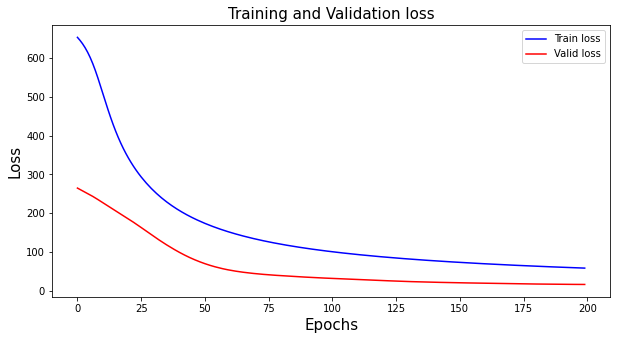

In [23]:
fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.plot(epoch_train_loss_value, 'blue', label='Train loss')
plt.plot(epoch_valid_loss_value, 'red', label='Valid loss')
plt.legend(loc='best')
plt.title('Training and Validation loss', fontsize=15)
plt.show()

## 模型预测

遍历valid数据，求出每一组的预测值

In [24]:
prediction = []

for i in range(valid_x.shape[0]):
    prediction.append(net(valid_x[i, :]).item())

预测值可视化，可以发现经过200轮的训练，预测值与真实值交融性很好，表明模型效果较好

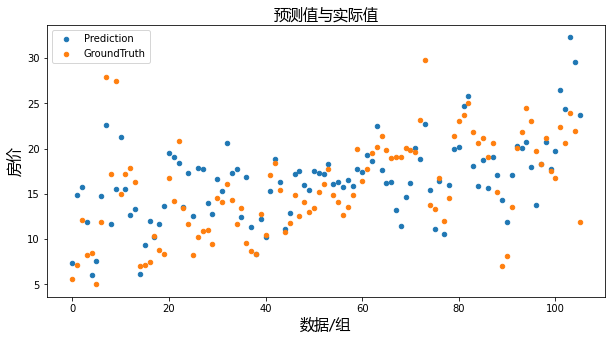

In [25]:
fig = plt.gcf()
fig.set_size_inches(10, 5)

myfont = FontProperties(fname='./font/msyh.ttc')

plt.title('预测值与实际值', fontproperties=myfont, fontsize=15)
plt.scatter(np.arange(len(prediction)), prediction, label='Prediction', s=20)
plt.scatter(np.arange(len(prediction)), valid_y.cpu().numpy(), label='GroundTruth', s=20)
plt.xlabel('数据/组', fontproperties=myfont, fontsize=15)
plt.ylabel('房价', fontproperties=myfont, fontsize=15)
plt.legend()

plt.show()